##  DỰ ÁN: PHÂN TÍCH & DỰ ĐOÁN KHẢ NĂNG SỐNG SÓT TRÊN TÀU TITANIC
##  Mục tiêu: Làm sạch và khám phá dữ liệu trước khi xây dựng mô hình dự đoán khả năng sống sót của hành khách.


###  0. Thiết lập môi trường & đọc dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random


# Thiết lập seed để kết quả tái lập
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

#Tạo thư mục lưu kết quả
os.makedirs("processed", exist_ok=True)
os.makedirs("pics", exist_ok=True)

# Đọc dữ liệu
df = pd.read_csv("train.csv")



### 1. Upload dữ liệu & kiểm tra sơ bộ

In [3]:
# Kích thước và thông tin tổng quát
print("Kích thước dữ liệu:", df.shape)
df.head()


Kích thước dữ liệu: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Kiểm tra giá trị khuyết(missing values) và thống kê cơ bản

Các giá trị khuyết cần được xử lý trước khi mô hình hóa để tránh sai lệch.

In [4]:
# Kiểm tra số lượng giá trị thiếu
df.isnull().sum()

# Thống kê mô tả các cột số
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. Làm sạch dữ liệu




In [5]:
#1. Xử lý giá trị thiếu

# Điền giá trị thiếu cho Age bằng trung vị
df["Age"].fillna(df["Age"].median(), inplace=True)

# Điền giá trị thiếu cho Embarked bằng giá trị phổ biến nhất
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Kiểm tra lại sau khi xử lý
df.isnull().sum()


#2. Loại bỏ cột không cần thiết

# Loại bỏ cột Name, Ticket, Cabin (ít giá trị hữu ích)
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df.head()


C:\Users\Luminous\AppData\Local\Temp\ipykernel_3896\789434161.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\Luminous\AppData\Local\Temp\ipykernel_3896\789434161.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### 4. Phân tích cơ bản

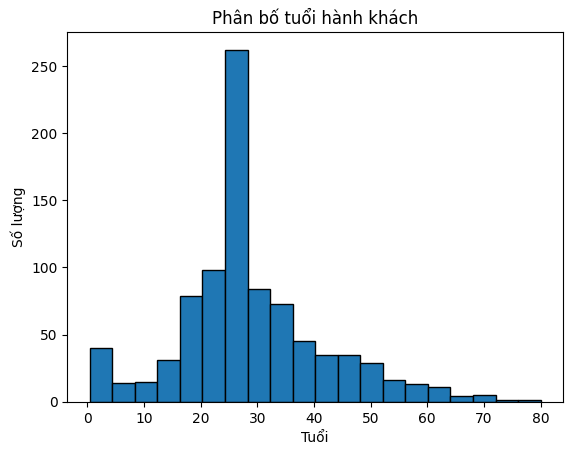

In [6]:
#Thống kê sống sót theo giới tính
df.groupby("Sex")["Survived"].mean()

#Phân tích sống sót theo hạng vé (Pclass)
df.groupby("Pclass")["Survived"].mean()

#Phân bố tuổi của hành khách
import matplotlib.pyplot as plt

plt.hist(df["Age"], bins=20, edgecolor="black")
plt.title("Phân bố tuổi hành khách")
plt.xlabel("Tuổi")
plt.ylabel("Số lượng")
plt.show()


### 5. Mã hóa và chuẩn hóa dữ liệu (chuẩn bị cho mô hình)

In [7]:
#Mã hóa biến phân loại
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df_encoded.head()

#Chuẩn hóa dữ liệu số
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ["Age", "Fare"]
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])
df_encoded.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,-0.565736,1,0,-0.502445,True,False,True
1,2,1,1,0.663861,1,0,0.786845,False,False,False
2,3,1,3,-0.258337,0,0,-0.488854,False,False,True
3,4,1,1,0.433312,1,0,0.420730,False,False,True
4,5,0,3,0.433312,0,0,-0.486337,True,False,True


### 6. Lưu dữ liệu đã xử lý

In [8]:
df_encoded.to_csv("processed/titanic_clean.csv", index=False)
print("✅ Dữ liệu đã được lưu vào processed/titanic_clean.csv")


✅ Dữ liệu đã được lưu vào processed/titanic_clean.csv


### 7. Đề xuất hướng phân tích

-Thực hiện EDA sâu hơn: kiểm tra mối quan hệ giữa tuổi, giới tính, Pclass, Embarked và Survived.

-Áp dụng mô hình phân loại (Logistic Regression, Decision Tree, Random Forest).

-Đánh giá bằng độ chính xác (Accuracy) và F1-score.